# 项目：沃尔玛销售预测

## 1. 简介

沃尔玛是一家著名的零售公司，经营着连锁大卖场。这里是沃尔玛45家商店的数据，包括商店信息和月销售额。数据每周提供一次。沃尔玛试图找到假期对商店销售的影响。因此，它将四个假期周纳入数据集，即圣诞节、感恩节、超级碗、劳动节。

### 分析目标

本实战项目的主要目标是预测未来一周的商店销售情况。同时分析销售是否受到基于时间的因素和基于空间的因素的影响，以及是否假期周会影响店内销售额？通过探索不同地区沃尔玛零售店销售额的影响因素，进一步创建预测模型，以预测未来的销售情况，并针对零售门店库存管理方面的问题提出建议，以使得供应与需求更加匹配。

#### 数据每列的含义如下：


- `Store`：店铺编号
- `Date`：销售周
- `Weekly_Sales`：店铺在该周的销售额
- `Holiday_Flag`：是否为假日周
- `Temperature`：销售日的温度
- `Fuel_Price`：该地区的燃油成本
- `CPI（消费者物价指数）`：消费者物价指数
- `Unemployment`：失业率

## 2. 载入库和数据集

In [1]:
import numpy as np     
import pandas as pd    
from pandas.plotting import autocorrelation_plot as auto_corr

import matplotlib.pyplot as plt    
import seaborn as sns
import sklearn
%matplotlib inline  

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 3. EDA 探索性数据分析

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Day'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.sample(20)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
6325,45,678228.58,0,68.59,2.713,182.669674,8.743,4,9,2010
4091,29,514993.00,0,56.44,3.633,136.472000,9.357,4,10,2011
2293,17,763961.82,0,29.71,2.733,126.604286,6.548,4,3,2010
1015,8,873337.84,0,61.35,2.854,213.665536,6.290,4,5,2010
6038,43,725043.04,0,78.86,2.582,203.449929,9.816,4,9,2010
3909,28,1402902.47,0,37.64,3.287,127.191774,14.021,4,1,2011
1994,14,1904512.34,1,75.70,3.911,191.577676,8.684,4,9,2012
4028,29,506502.09,0,76.91,2.784,132.582581,10.409,4,7,2010
3788,27,1817914.71,0,73.26,4.025,138.860638,7.725,4,6,2011
6276,44,336479.49,0,83.68,3.595,130.683000,5.407,4,7,2012


In [8]:
df.shape

(6435, 10)

In [9]:
df12 = df.copy()

#### 3.1 描述性统计分析

<Axes: >

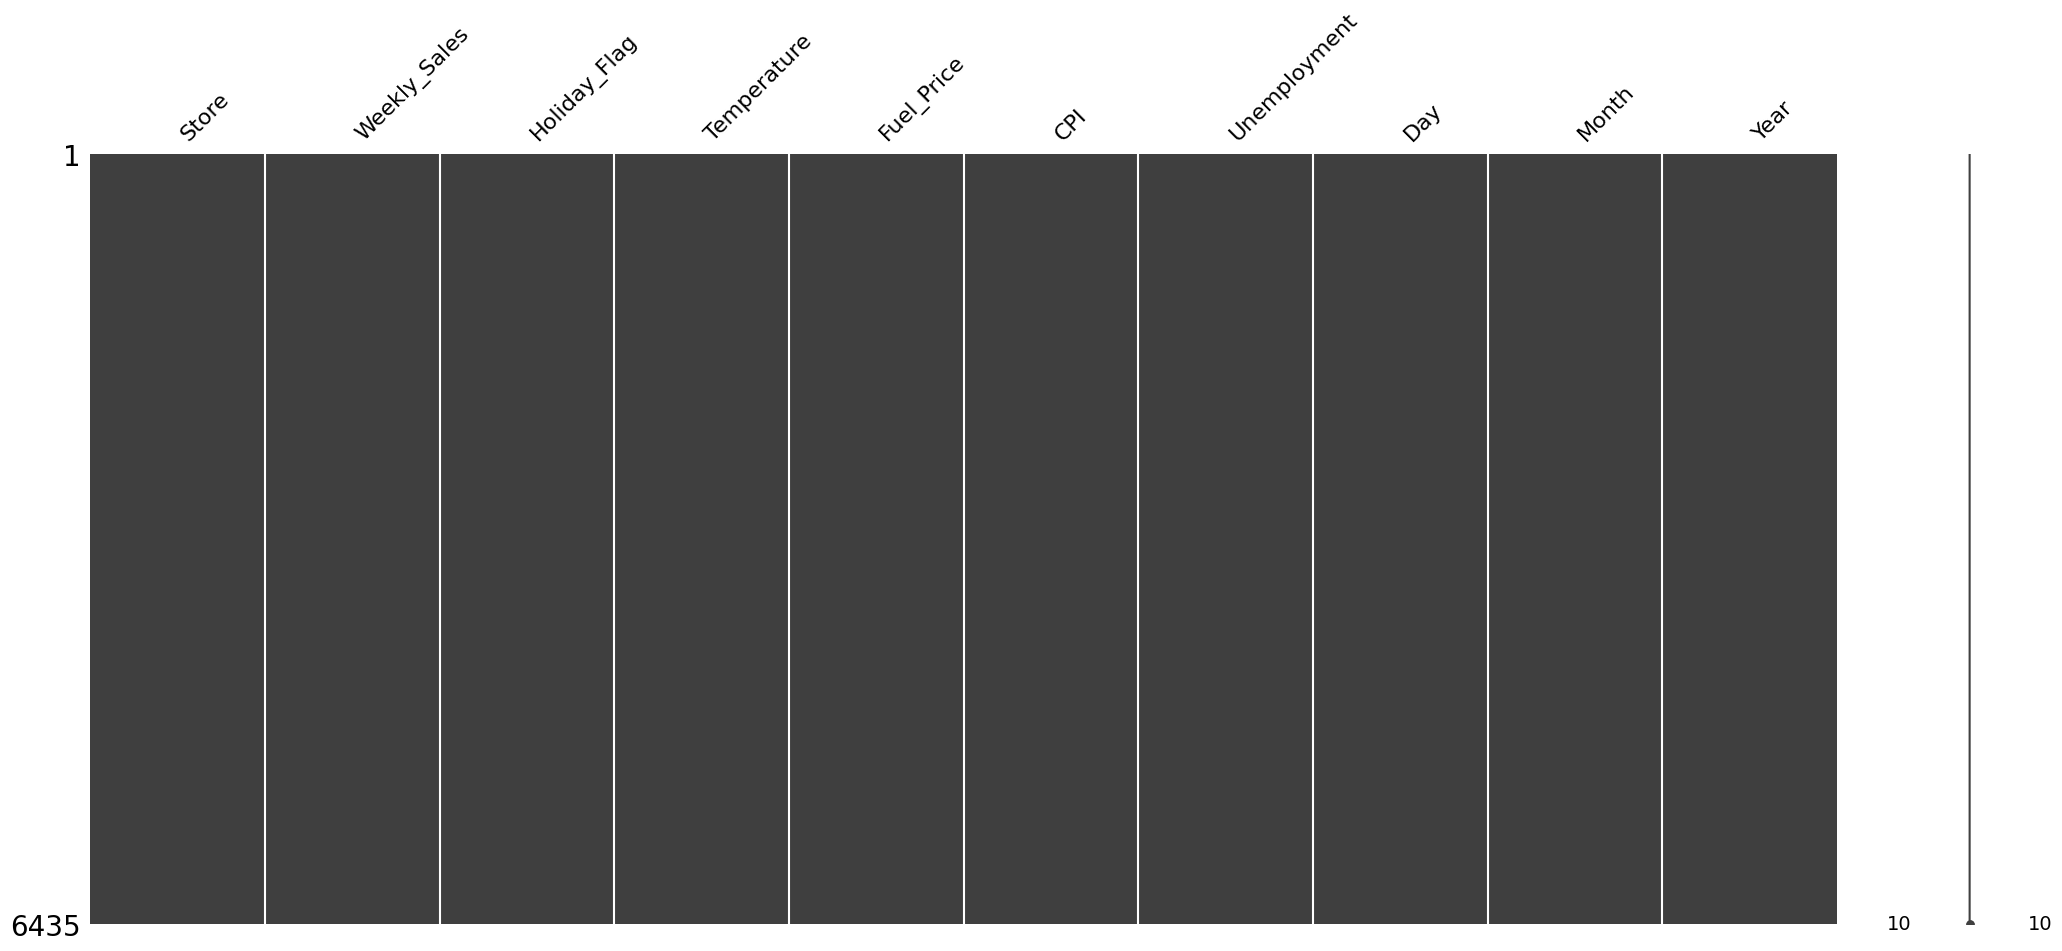

In [10]:
import missingno as msgn
msgn.matrix(df)

可以看到，所有变量上都无缺失值。

**将月和日转化为分类变量：**

In [11]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['Day'] = df['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df['Month']= df['Month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Thursday,February,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,February,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Thursday,March,2010


In [12]:
for i in ['Store','Fuel_Price','Unemployment','Day','Month','Year']:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Fuel_Price: 892
Unemployment: 349
Day: 1
Month: 12
Year: 3


<Axes: xlabel='Year', ylabel='count'>

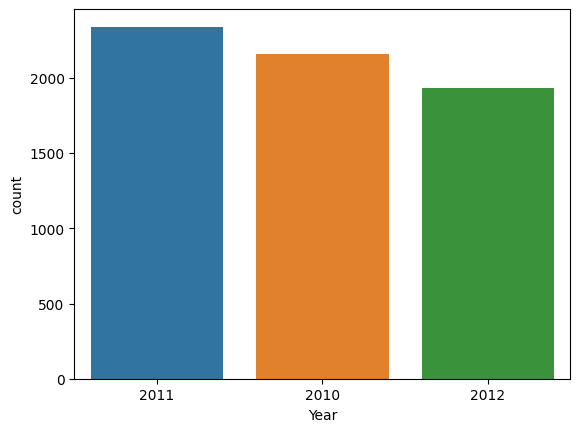

In [13]:
sns.countplot(data=df, x=df['Year'], order=df['Year'].value_counts().index)

由上图可知，2011年销售额依次高于2010、2012年。

<Axes: xlabel='Month', ylabel='count'>

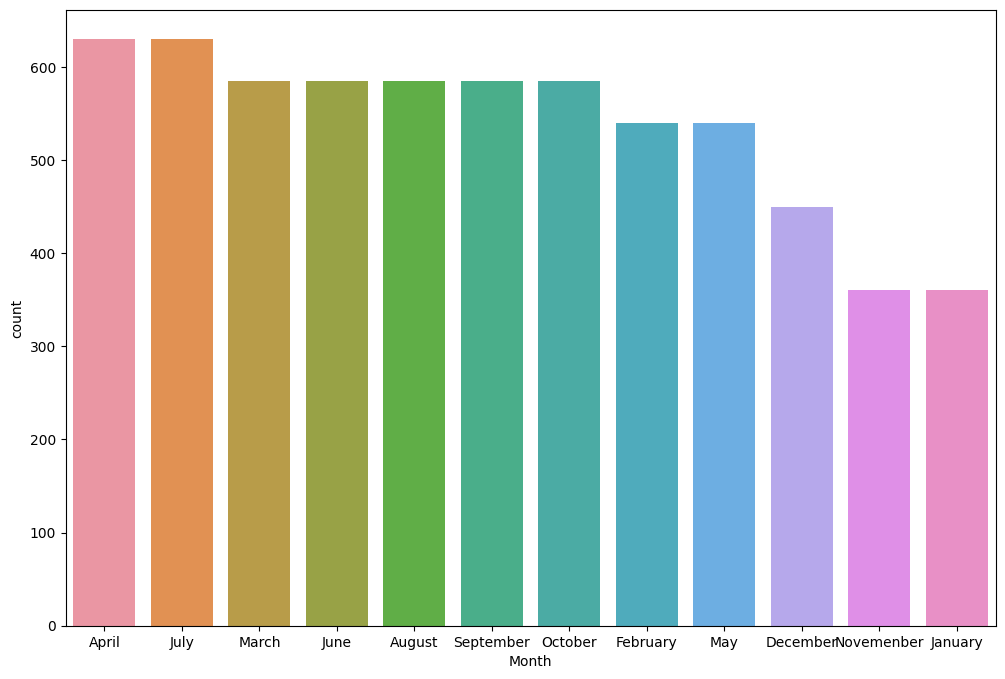

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x= df['Month'], order= df['Month'].value_counts().index)

可以看出，3月和6月销售额较高，而冬季11、12、1月销售额较低。

In [15]:
df.groupby('Year')['Weekly_Sales'].sum()

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Annual Sales')

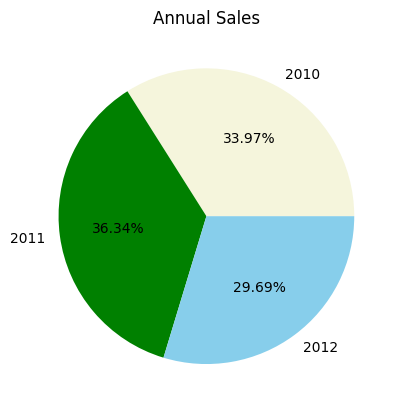

In [16]:
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['beige','green','skyblue'])
plt.title('Annual Sales')

In [17]:
df2 = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
df2

,Month,Weekly_Sales
0,April,6.468598e+08
1,August,6.130902e+08
2,December,5.768386e+08
3,February,5.687279e+08
4,January,3.325984e+08
5,July,6.500010e+08
6,June,6.226299e+08
7,March,5.927859e+08
8,May,5.571256e+08
9,Novemenber,4.130157e+08


([<matplotlib.patches.Wedge at 0x1b5d0422940>,
 [Text(1.0503377816992563, 0.32678822551476006, 'April'),
  Text(0.6930768429266986, 0.8541923025869295, 'August'),
  Text(0.13907870040044096, 1.0911723581061448, 'December'),
  Text(-0.4358537395908651, 1.0099660972946858, 'February'),
  Text(-0.8100149067981962, 0.7442283592854478, 'January'),
  Text(-1.0556568018997095, 0.30917424957922657, 'July'),
  Text(-1.0480601899933, -0.33402071515282983, 'June'),
  Text(-0.7048601208590872, -0.8444952397867694, 'March'),
  Text(-0.17449844294960315, -1.0860710351575371, 'May'),
  Text(0.31778497659832106, -1.053096723311019, 'Novemenber'),
  Text(0.7564980108166195, -0.7985679430270776, 'October'),
  Text(1.060183525248035, -0.2932761374415746, 'September')],
 [Text(0.5729115172905034, 0.1782481230080509, '9.60%'),
  Text(0.3780419143236537, 0.4659230741383251, '9.10%'),
  Text(0.07586110930933143, 0.5951849226033515, '8.56%'),
  Text(-0.23773840341319913, 0.5508905985243739, '8.44%'),
  Text(-

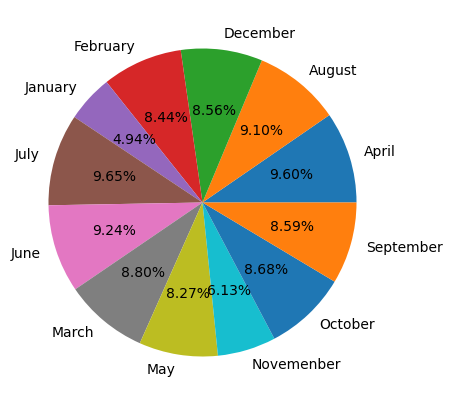

In [18]:
plt.figure(figsize=(5,5))
plt.pie(df2['Weekly_Sales'],labels=df2['Month'],normalize=True,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x1b5d04bd460>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

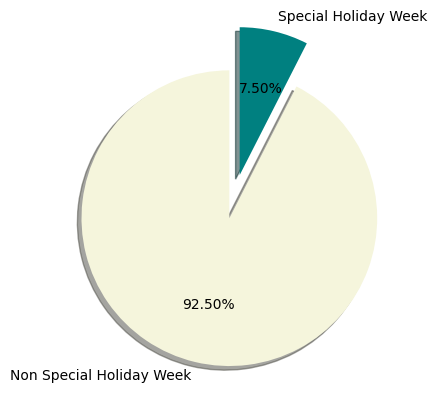

In [19]:
df3 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df3['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['beige', 'teal'])

In [20]:
df.groupby('Store')['Weekly_Sales'].count().reset_index()

,Store,Weekly_Sales
0,1,143
1,2,143
2,3,143
3,4,143
4,5,143
5,6,143
6,7,143
7,8,143
8,9,143
9,10,143


In [21]:
df.groupby('Store')['Weekly_Sales'].sum().reset_index()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [22]:
df.groupby('Store')['Weekly_Sales'].sum().max()

301397792.46

【观察】：  
- 2011年销售额依次高于2010、2012年。
- 3月和6月销售额较高，而冬季11、12、1月销售额较低。
- 大多数销售记录发生在非假日周。可能顾客们都不想把假日拿来购物，也有可能顾客们在假日前去购物以准备庆祝假日。
- 20号门店销售额最高。

#### 3.2 销售额分布

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_68148\2859841461.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

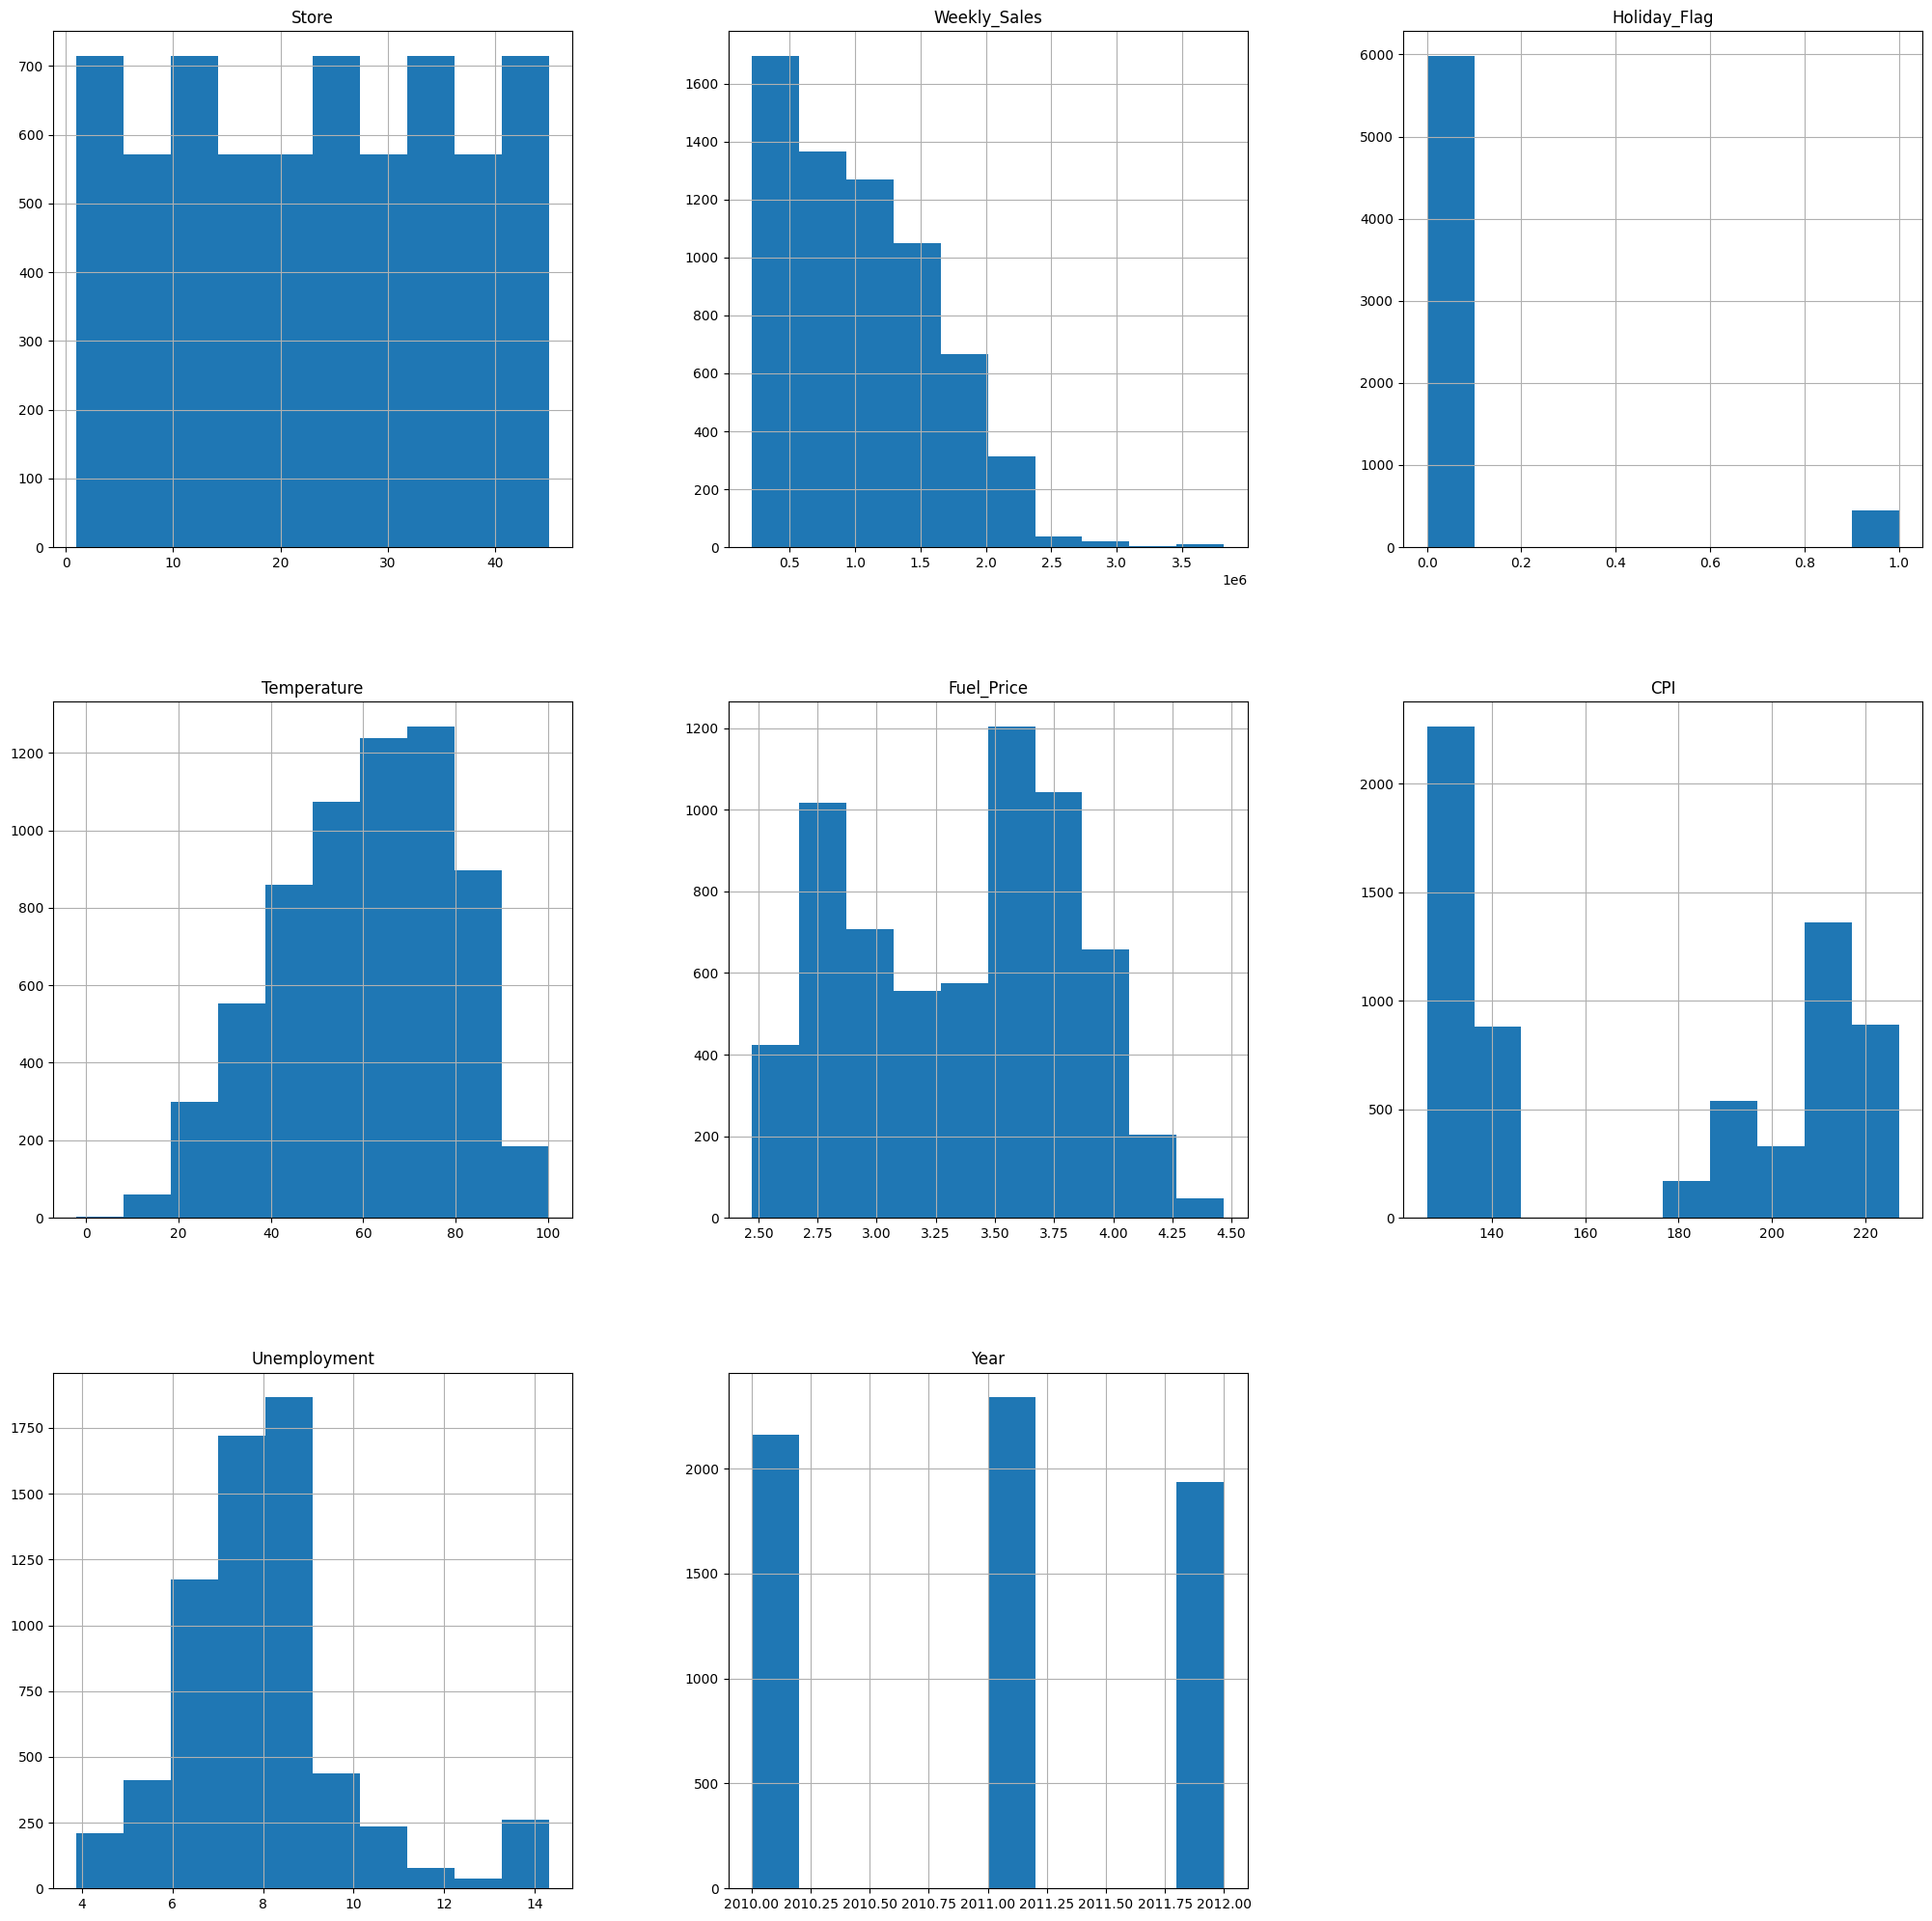

In [23]:
# gca全称是get current axes，就是获得当前的坐标轴的句柄，我们也可以在创建的时候就保留下该句柄，同时fig.gca()等价于plt.gca()。
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

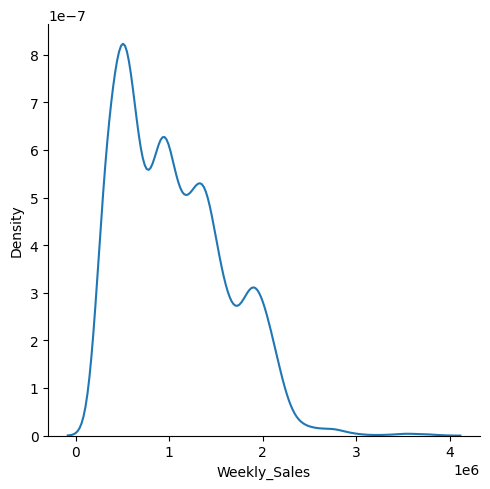

In [24]:
sns.displot(data=df, x=df['Weekly_Sales'], kind='kde')

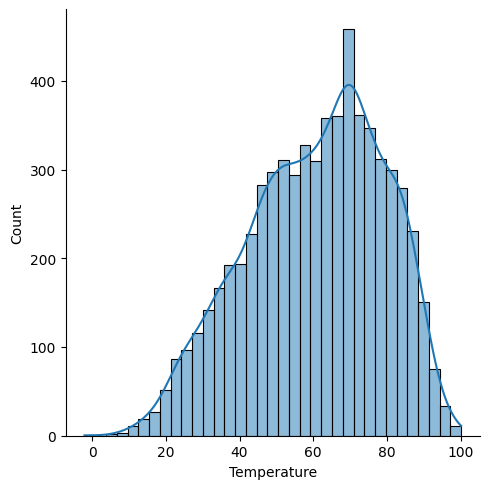

In [25]:
sns.displot(data=df, x=df['Temperature'], kde=True)

<Axes: xlabel='Temperature'>

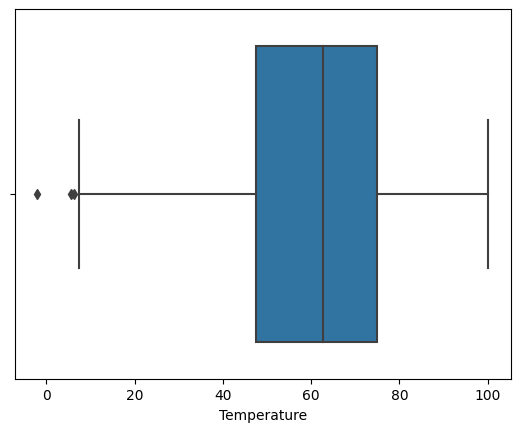

In [26]:
sns.boxplot(data=df, x=df['Temperature'])

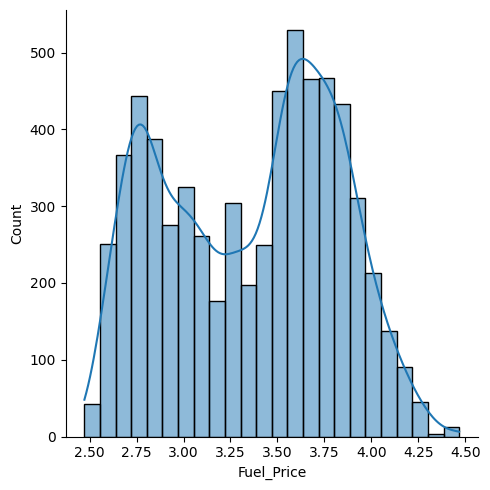

In [27]:
sns.displot(x=df['Fuel_Price'],kde=True)

<Axes: xlabel='Fuel_Price'>

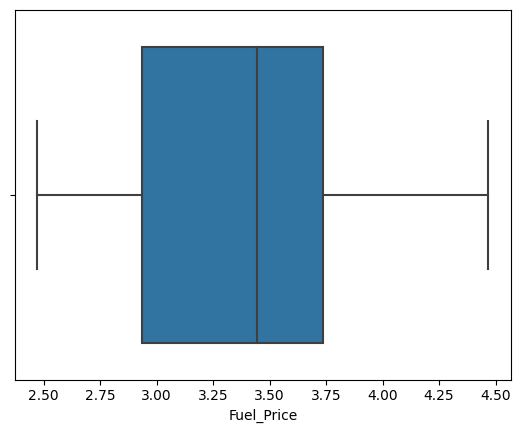

In [28]:
sns.boxplot(x=df['Fuel_Price'])

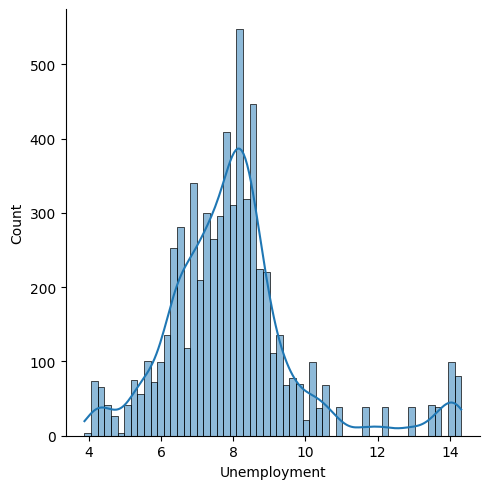

In [29]:
sns.displot(x=df['Unemployment'],kde=True)

<Axes: xlabel='Unemployment'>

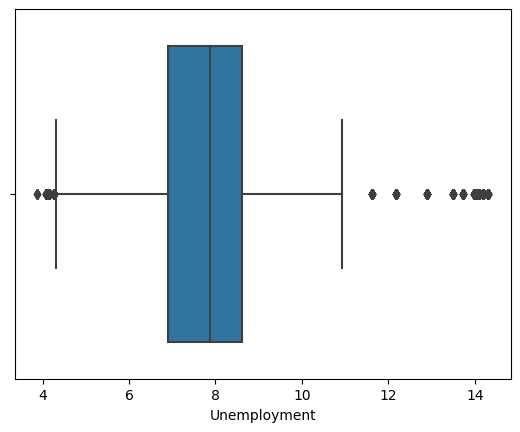

In [30]:
sns.boxplot(x=df['Unemployment'])

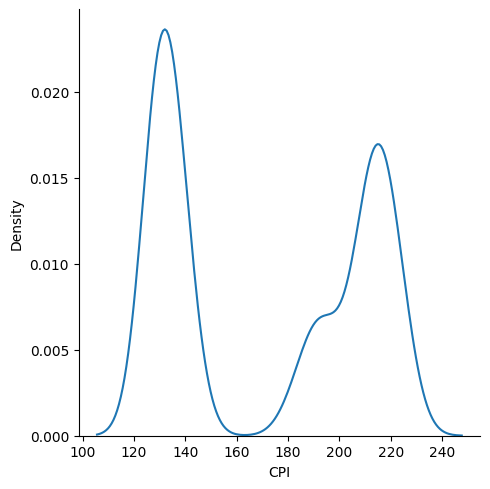

In [31]:
sns.displot(x=df['CPI'],kind='kde')

<Axes: xlabel='CPI'>

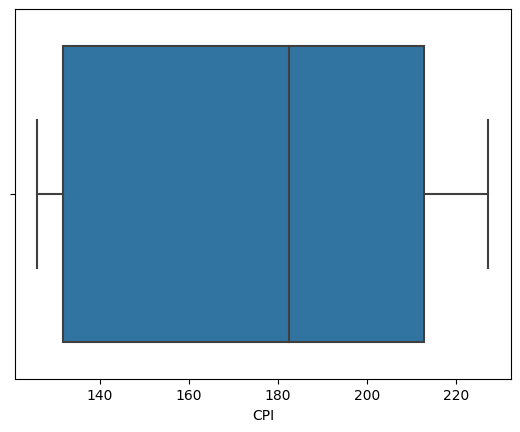

In [32]:
sns.boxplot(x=df['CPI'])

## 4. 数据预处理

### 4.1 使用Power Transformation方法进行数据转换

In [33]:
cols =['Temperature','Fuel_Price','CPI','Unemployment']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

pd.DataFrame({'cols':cols, 'box-cox lamda': pt.lambdas_})

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,Thursday,February,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,Thursday,February,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,Thursday,February,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,Thursday,February,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,Thursday,March,2010


### 4.2 移除极端值

In [34]:
df.shape

(6435, 10)

In [35]:
# 移除失业率极端值
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-1.5*(IQR)]
df = df[df['Unemployment'] <= Q3+1.5*(IQR)]
df.shape

(5922, 10)

In [36]:
# 移除温度极端值
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]

df = df[df['Temperature'] <= Q3+1.5*(IQR)]
df.shape

(5922, 10)

<Axes: xlabel='Temperature'>

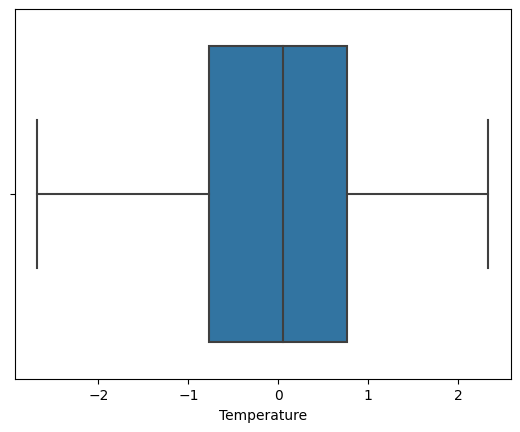

In [37]:
sns.boxplot(x=df['Temperature'])

<Axes: xlabel='Unemployment'>

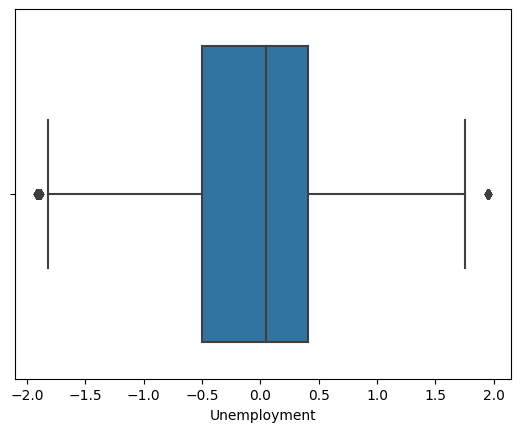

In [38]:
sns.boxplot(x=df['Unemployment'])

In [39]:
yr = {2010:0, 2011:1, 2012:2}
df['Year'] = df['Year'].map(yr)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,Thursday,February,0
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,Thursday,February,0
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,Thursday,February,0
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,Thursday,February,0
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,Thursday,March,0


In [40]:
mn = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'Novemenber':11,'December':12}
df['Month'] = df['Month'].map(mn)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,Thursday,2,0
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,Thursday,2,0
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,Thursday,2,0
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,Thursday,2,0
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,Thursday,3,0


In [41]:
tge= {'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5,  'Friday':6,'Saturday':7}
df['Day'] = df['Day'].map(tge)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,5,2,0
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,5,2,0
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,5,2,0
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,5,2,0
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,5,3,0


#### 4.3 分割数据集

In [42]:
X = df.drop(['Weekly_Sales'],axis=1)
Y = df['Weekly_Sales']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [44]:
# 需要先将ndarray转化为dataframe，否则下面会报错Specifying the columns using strings is only supported for pandas DataFrames
columns = X_train.columns
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [45]:
X_train

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
4478,32,0,-1.321202,-1.257095,0.582357,0.714849,5,12,0
1536,11,0,-0.479108,0.315795,1.255573,-0.581706,5,2,2
4159,30,0,0.303291,-1.252918,0.985505,0.237086,5,4,0
1271,9,0,1.217346,-0.239773,1.288571,-1.765087,5,7,2
3143,22,0,-0.403793,1.481272,-0.665474,-0.135897,5,10,2
...,...,...,...,...,...,...,...,...,...
4102,29,0,-1.140227,0.102443,-0.863136,0.819031,5,12,1
5621,40,0,-1.959448,-0.507292,-0.989858,-1.756341,5,12,0
5739,41,0,-0.365102,-1.473323,0.546242,-0.244404,5,6,0
5903,42,0,-0.017870,-0.511587,-1.196665,0.649993,5,11,0


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(drop='first'),['Store'])],remainder='passthrough')

In [47]:
X_train = transformer.fit_transform(X_train)

In [48]:
X_test = transformer.transform(X_test)

#### 4.4 标准化

In [49]:
'''
from sklearn.preprocessing import RobustScaler
std = RobustScaler( with_centering=False)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
'''

'\nfrom sklearn.preprocessing import RobustScaler\nstd = RobustScaler( with_centering=False)\nX_train = std.fit_transform(X_train)\nX_test = std.transform(X_test)\n'

## 5. 构建模型进行预测

### 5.1 特征选择

egression Metrics：  
- MSE
- MAE
- R2 SCORE
- RMSE
- Median ABsolute Erro
- Predictions Error Rate
- Almost Correct Predictions Error Rate

In [50]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [51]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    print(model)
    print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
    print(f'R2 : {r2_score(Y_test,y_pred)}')

In [52]:
pred_model(LinearRegression,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 22866851295.278675
MAE: 96127.09188879735
R2 : 0.9282070333306591


In [53]:
pred_model(Lasso,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 22842115289.764355
MAE: 96020.00850795142
R2 : 0.9282846947102907


d:\software\python\python 3.8.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37725085630106.83, tolerance: 116237274601.84879
  model = cd_fast.sparse_enet_coordinate_descent(


In [54]:
pred_model(Ridge,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 23057959399.045937
MAE: 95962.42613420576
R2 : 0.9276070286537215


In [55]:
pred_model(RandomForestRegressor,X_train,Y_train,X_test,Y_test)

d:\software\python\python 3.8.10\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 22739089484.69403
MAE: 75393.36411490082
R2 : 0.9286081554305265


In [56]:
pred_model(ElasticNet,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 288244382716.42096
MAE: 454323.1439980214
R2 : 0.09502541063633785
